In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow
import glob
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd drive

/content/drive


In [ ]:
cd My Drive

/content/drive/My Drive


In [ ]:
cd data

/content/drive/My Drive/data


In [ ]:
x_normal = np.load('x_normal.npy')
y_normal = np.load('y_normal.npy')
x_viral = np.load('x_viral.npy')
y_viral = np.load('y_viral.npy')
x_bacterial = np.load('x_bacterial.npy')
y_bacterial = np.load('y_bacterial.npy')
x_covid = np.load('x_covid.npy')
y_covid = np.load('y_covid.npy')

In [ ]:
print(x_normal.shape)
print(y_normal.shape)
print(x_viral.shape)
print(y_viral.shape)
print(x_bacterial.shape)
print(y_bacterial.shape)
print(x_covid.shape)
print(y_covid.shape)

(1583, 256, 256, 3)
(1583,)
(1504, 256, 256, 3)
(1504,)
(2786, 256, 256, 3)
(2786,)
(239, 256, 256, 3)
(239,)


In [ ]:
import random
x_train=[]
y_train=[]
x_test = []
y_test = []

In [ ]:
nums = random.sample(range(0, 2786), 219)
for i in nums:
  x_train.append(x_bacterial[i])
  y_train.append(1)

total = [i for i in range(0,2786)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_bacterial[i])
  y_test.append(1)

In [ ]:
nums = random.sample(range(0, 1504), 219)
for i in nums:
  x_train.append(x_viral[i])
  y_train.append(2)

total = [i for i in range(0,1504)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_viral[i])
  y_test.append(2)

In [ ]:
nums = random.sample(range(0, 239), 219)
for i in nums:
  x_train.append(x_covid[i])
  y_train.append(3)

total = [i for i in range(0,239)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_covid[i])
  y_test.append(3)

In [ ]:
nums = random.sample(range(0, 1583), 219)
for i in nums:
  x_train.append(x_normal[i])
  y_train.append(0)

total = [i for i in range(0,1583)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_normal[i])
  y_test.append(0)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

876
876
80
80


In [ ]:
x_train = np.asarray(x_train)
y_train= np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
for i in range(876):
    img = x_train[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  
    x_train[i]=img

print('Shape of train images: ', x_train[0].shape)

Shape of train images:  (256, 256, 3)


In [ ]:
for i in range(80):
    img = x_test[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  
    x_test[i]=img

print('Shape of test images: ', x_test[0].shape)

Shape of test images:  (256, 256, 3)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=8,kernel_size=(3,3),input_shape=(256,256,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=16,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=4,kernel_size=(3,3),strides=1,padding='same'))
 
model.add(layers.Flatten())
 
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=y_train.reshape(-1,1)
yfunc=enc.fit(y)
y_binary=enc.transform(y).toarray()
y_test=y_test.reshape(-1,1)
y_test=enc.transform(y_test).toarray()

In [ ]:
print(x_train.shape,y_binary.shape)


(876, 256, 256, 3) (876, 4)


In [ ]:
opt = adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=32)
mc = ModelCheckpoint('single_unit_four_class09jun01.h5', monitor='val_accuracy',mode='max', verbose=1, save_best_only=True)
history=model.fit(x_train,y_binary,batch_size=16,epochs=100, validation_split=0.2,callbacks=[es,mc],shuffle=True)

Train on 700 samples, validate on 176 samples
Epoch 1/100
700/700 [==============================] - 63s 91ms/step - loss: 1.1723 - accuracy: 0.5400 - val_loss: 0.8320 - val_accuracy: 0.7443

Epoch 00001: val_accuracy improved from -inf to 0.74432, saving model to single_unit_four_class09jun01.h5
Epoch 2/100
700/700 [==============================] - 59s 84ms/step - loss: 0.5467 - accuracy: 0.7757 - val_loss: 1.2657 - val_accuracy: 0.3693

Epoch 00002: val_accuracy did not improve from 0.74432
Epoch 3/100
700/700 [==============================] - 58s 83ms/step - loss: 0.3876 - accuracy: 0.8529 - val_loss: 2.2874 - val_accuracy: 0.0455

Epoch 00003: val_accuracy did not improve from 0.74432
Epoch 4/100
700/700 [==============================] - 59s 84ms/step - loss: 0.2715 - accuracy: 0.9071 - val_loss: 2.6785 - val_accuracy: 0.0341

Epoch 00004: val_accuracy did not improve from 0.74432
Epoch 5/100
700/700 [==============================] - 59s 84ms/step - loss: 0.1985 - accuracy: 0.9

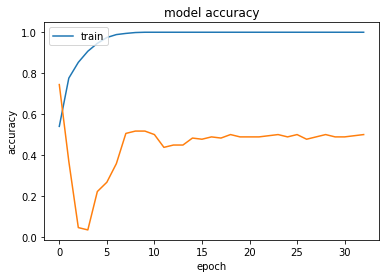

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show() 

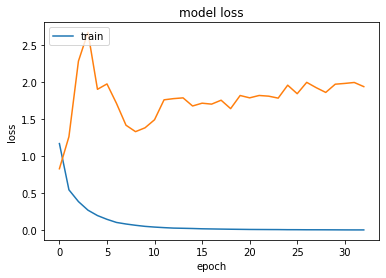

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=8,kernel_size=(3,3),input_shape=(256,256,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=16,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=4,kernel_size=(3,3),strides=1,padding='same'))
 
model.add(layers.Flatten())
 
model.add(layers.Dense(4, activation='softmax'))
model.load_weights('single_unit_four_class09jun01.h5')


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=y_test.reshape(-1,1)
yfunc=enc.fit(y)
y_binary=enc.transform(y).toarray()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print("test accuracy: ",test_acc,)
print("test loss    : ",_)

test accuracy:  0.5375000238418579
test loss    :  1.392874574661255


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

(80, 4)

In [ ]:
classes = np.argmax(y_pred,axis=-1)

In [ ]:
classes


array([1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 1, 1,
       1, 1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test=enc.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,classes)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


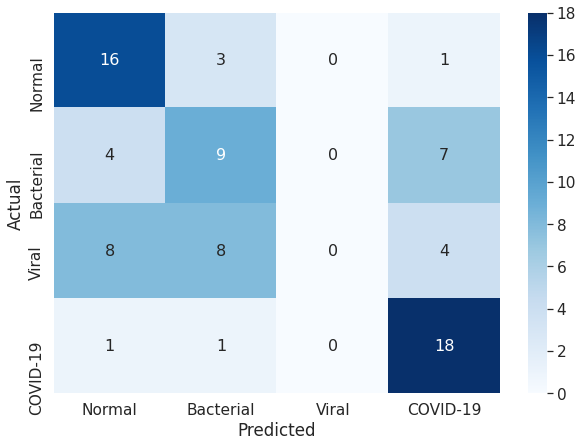

In [ ]:
import seaborn as sns
import pandas as pd
df_cm = pd.DataFrame(cm, columns=['Normal','Bacterial','Viral','COVID-19'], index = ['Normal','Bacterial','Viral','COVID-19'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')

In [ ]:
def calc_metrics(cm):
  tp_nor=cm[0][0]
  fp_nor=cm[1][0]+cm[2][0]+cm[3][0]
  fn_nor=cm[0][1]+cm[0][2]+cm[0][3]
  tn_nor=np.sum(cm)-(tp_nor+fp_nor+fn_nor)
  tp_bac=cm[1][1]
  fp_bac=cm[0][1]+cm[2][1]+cm[3][1]
  fn_bac=cm[1][0]+cm[1][2]+cm[1][3]
  tn_bac=np.sum(cm)-(tp_bac+fp_bac+fn_bac)
  tp_vir=cm[2][2]
  fp_vir=cm[0][2]+cm[1][2]+cm[3][2]
  fn_vir=cm[2][0]+cm[2][1]+cm[2][3]
  tn_vir=np.sum(cm)-(tp_vir+fp_vir+fn_vir)
  tp_cov=cm[3][3]
  fp_cov=cm[0][3]+cm[1][3]+cm[2][3]
  fn_cov=cm[3][0]+cm[3][1]+cm[3][2]
  tn_cov=np.sum(cm)-(tp_cov+fp_cov+fn_cov)

  print("Normal : ")
  print("-----------------------------------")
  print("TP : ",tp_nor)
  print("TN : ",tn_nor)
  print("FP : ",fp_nor)
  print("FN : ",fn_nor)
  print("sensitivity : ",tp_nor/(float)((tp_nor+fn_nor)))
  print("specificity : ",tn_nor/(float)((tn_nor+fp_nor)))
  print("-----------------------------------")
  print("Bacteria : ")
  print("-----------------------------------")
  print("TP : ",tp_bac)
  print("TN : ",tn_bac)
  print("FP : ",fp_bac)
  print("FN : ",fn_bac)
  print("sensitivity : ",tp_bac/(float)((tp_bac+fn_bac)))
  print("specificity : ",tn_bac/(float)((tn_bac+fp_bac)))
  print("-----------------------------------")
  print("Viral : ")
  print("-----------------------------------")
  print("TP : ",tp_vir)
  print("TN : ",tn_vir)
  print("FP : ",fp_vir)
  print("FN : ",fn_vir)
  print("sensitivity : ",tp_vir/(float)((tp_vir+fn_vir)))
  print("specificity : ",tn_vir/(float)((tn_vir+fp_vir)))
  print("-----------------------------------")
  print("COVID-19 : ")
  print("-----------------------------------")
  print("TP : ",tp_cov)
  print("TN : ",tn_cov)
  print("FP : ",fp_cov)
  print("FN : ",fn_cov)
  print("sensitivity : ",tp_cov/(float)((tp_cov+fn_cov)))
  print("specificity : ",tn_cov/(float)((tn_cov+fp_cov)))


In [ ]:
calc_metrics(cm)

Normal : 
-----------------------------------
TP :  16
TN :  47
FP :  13
FN :  4
sensitivity :  0.8
specificity :  0.7833333333333333
-----------------------------------
Bacteria : 
-----------------------------------
TP :  9
TN :  48
FP :  12
FN :  11
sensitivity :  0.45
specificity :  0.8
-----------------------------------
Viral : 
-----------------------------------
TP :  0
TN :  60
FP :  0
FN :  20
sensitivity :  0.0
specificity :  1.0
-----------------------------------
COVID-19 : 
-----------------------------------
TP :  18
TN :  48
FP :  12
FN :  2
sensitivity :  0.9
specificity :  0.8
